All Imports

In [161]:
%matplotlib inline
import pandas as pd

Init Variables

In [28]:
global DATA_PATH

DATA_PATH = '../data/'
TEMP_PATH = '../temp/'

Index stocks by indistries and read data

In [21]:
stock_index = pd.read_csv(DATA_PATH + 'stocks/stocks_index.csv')

In [134]:
def get_data(sector):
    
    print 'getting fresh data'
    
    stocks_df = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])

    for index, ticker in stock_index[stock_index['Sector'] == sector].iterrows():

        try: stock_df = pd.read_csv(DATA_PATH + 'stocks/daily/' + ticker['BSE_Scrip_Id'] + '.csv', usecols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])
        except IOError: pass

        stock_df['bse_scrip_id'] = ticker['BSE_Scrip_Id']
        #stocks_df = pd.merge(stocks_df, stock_df, how = 'outer', on=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])
        stocks_df = stocks_df.append(stock_df)

    stocks_df['split_ratio'] = stocks_df['Adj Close']/stocks_df['Close']
    stocks_df['Adj High'] = stocks_df['split_ratio'] * stocks_df['High']
    stocks_df['Adj Low'] = stocks_df['split_ratio'] * stocks_df['Low']
    stocks_df['Adj Open'] = stocks_df['split_ratio'] * stocks_df['Open']
    stocks_df['Adj Volume'] = stocks_df['split_ratio'] * stocks_df['Volume']
    
    stocks_df.to_csv(TEMP_PATH + 'stocks/' + sector + '.csv', index = False)
    
    return stocks_df

In [154]:
def get_data(sector):
    
    stocks_by_kind = {}
    
    stocks_df = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])

    for index, ticker in stock_index[stock_index['Sector'] == sector].iterrows():

        try: stock_df = pd.read_csv(DATA_PATH + 'stocks/daily/' + ticker['BSE_Scrip_Id'] + '.csv', usecols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], index_col = 'Date', parse_dates = True)
        except IOError: continue

        stock_df['split_ratio'] = stock_df['Adj Close']   / stock_df['Close']
        stock_df['Adj High']    = stock_df['split_ratio'] * stock_df['High']
        stock_df['Adj Low']     = stock_df['split_ratio'] * stock_df['Low']
        stock_df['Adj Open']    = stock_df['split_ratio'] * stock_df['Open']
        stock_df['Adj Volume']  = stock_df['split_ratio'] * stock_df['Volume']                   
        #stock_df['bse_scrip_id'] = ticker['BSE_Scrip_Id']
        
        for kind in list(stock_df.columns):

            
            stock_column         = stock_df[[kind]]
            stock_column.columns = [ticker['BSE_Scrip_Id']]
            
            if kind not in stocks_by_kind: 
                stocks_by_kind[kind] = stock_column
            else:                          
                #stocks_by_kind[kind] = stocks_by_kind[kind].join(stock_column, how = 'outer')
                stocks_by_kind[kind] = pd.merge(stocks_by_kind[kind], stock_column, how = 'outer', left_index = True, right_index = True)
            
    return stocks_by_kind

Main

In [155]:
def main():
    
    sector = 'Technology'
    
    try: input_df = pd.read_csv(TEMP_PATH + 'stocks/' + sector + '.csv')
    except IOError: input_df = get_data(sector)
        
    return input_df

In [156]:
input_df = main()

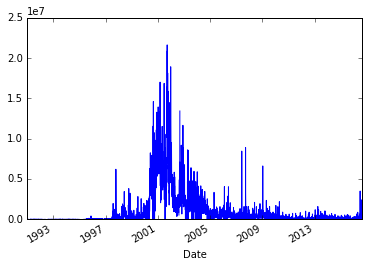

In [135]:
input_df = main()

getting fresh data
